In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('MSFT.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,%K,%R,...,MACD_Signal,BB_Middle,BB_Std_Dev,BB_Upper,BB_Lower,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101563
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,NaN,NaN,NaN,...,0.000055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099826
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,NaN,NaN,NaN,...,0.000170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100260
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,NaN,NaN,NaN,...,0.000274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110243
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,NaN,NaN,NaN,...,0.000338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117188
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.058876,58435200,NaN,NaN,NaN,...,0.000330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118056
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057270,59990400,NaN,NaN,NaN,...,0.000236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.114583
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.055665,65289600,NaN,NaN,NaN,...,0.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111979
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.056735,32083200,NaN,NaN,NaN,...,-0.000154,NaN,NaN,NaN,NaN,0.095920,NaN,NaN,NaN,0.110243
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.058341,22752000,NaN,NaN,NaN,...,-0.000319,NaN,NaN,NaN,NaN,0.096354,NaN,NaN,NaN,0.110243


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9722 non-null   object 
 1   Open           9722 non-null   float64
 2   High           9722 non-null   float64
 3   Low            9722 non-null   float64
 4   Close          9722 non-null   float64
 5   Adj Close      9722 non-null   float64
 6   Volume         9722 non-null   int64  
 7   RSI            9709 non-null   float64
 8   %K             9709 non-null   float64
 9   %R             9709 non-null   float64
 10  MA20           9703 non-null   float64
 11  MA50           9673 non-null   float64
 12  MA100          9623 non-null   float64
 13  Returns        9721 non-null   float64
 14  Close_lag_1    9721 non-null   float64
 15  Close_lag_2    9720 non-null   float64
 16  Close_lag_3    9719 non-null   float64
 17  Close_lag_4    9718 non-null   float64
 18  Close_la

In [4]:
del data['Date']

In [5]:
data = data.dropna(axis=0)

In [6]:
train_split = 0.7
train_data = pd.DataFrame(data.iloc[0:int(len(data)*train_split), :])
test_data = pd.DataFrame(data.iloc[int(len(data)*train_split):len(data), :])

In [7]:
print(len(train_data))
print(len(test_data))

6717
2880


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train_data = pd.DataFrame(scaler.fit_transform(train_data))
scaled_test_data = pd.DataFrame(scaler.transform(test_data))

scaled_train_data.columns = train_data.columns
scaled_test_data.columns = test_data.columns

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300, random_state=42)

X_train = []
Y_train = []

# Preparing data for feature selection using RF
for i in range(1, scaled_train_data.shape[0]):
    X_train.append(scaled_train_data.iloc[i-1, :])
    Y_train.append(scaled_train_data['Close'][i])

X_train = pd.DataFrame(X_train)
X_train.columns = scaled_train_data.columns


In [22]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [25]:
# Get feature importances from the trained model
importances = rfr.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1][:10]

Close: 0.4252643310225726
Adj Close: 0.2631091847211126
High: 0.12497007552333095
Low: 0.09065176830952702
BB_Lower: 0.06465181779209472
senkou_span_b: 0.007504086197849071
MA100: 0.006188498512389469
BB_Middle: 0.003686531196317644
Close_lag_1: 0.003245893519782341
MA50: 0.0017101263150086476


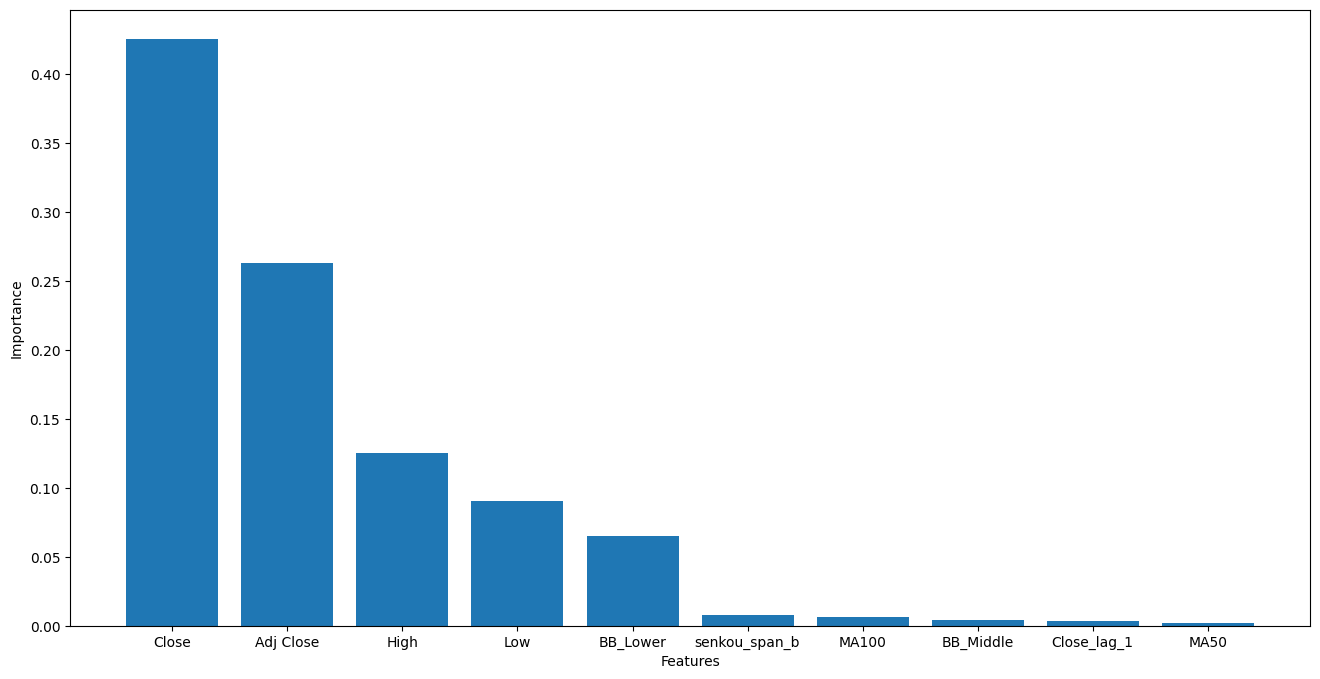

In [30]:
import matplotlib.pyplot as plt
important_columns = []
top_importances = []
for index in indices: 
    important_columns.append(X_train.columns[index])
    top_importances.append(importances[index])
    print(f"{X_train.columns[index]}: {importances[index]}")

plt.figure(figsize=(16, 8))
plt.bar(important_columns, top_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [31]:
x_train = []
y_train = [] 

x_test = []
y_test = []

for i in range(100, scaled_train_data.shape[0]):
    x_train.append(scaled_train_data.iloc[i-100: i, indices])
    y_train.append(scaled_train_data['Close'][i])

for i in range(100, scaled_test_data.shape[0]):
    x_test.append(scaled_test_data.iloc[i-100: i, indices])
    y_test.append(scaled_test_data['Close'][i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6617, 100, 10)
(6617,)
(2780, 100, 10)
(2780,)


In [33]:
from keras.layers import LSTM, Dense, Input
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(x_train.shape[1], x_train.shape[2],)))
model.add(LSTM(units=30))
model.add(Dense(units = 1))


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30)             │         4,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,951 (19.34 KB)

 Trainable params: 4,951 (19.34 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0885 - mae: 0.1558
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1757e-04 - mae: 0.0168
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5685e-04 - mae: 0.0143
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2530e-04 - mae: 0.0120
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.4897e-04 - mae: 0.0102
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8250e-04 - mae: 0.0086
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4806e-04 - mae: 0.0075
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3854e-04 - mae: 0.0073
Epoch 9/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3707e-04 - mae: 0.0071
Epoch 10/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5437e-04 - mae: 0.0078
Epoch 11/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4049e-04 - mae: 0.0071
Epoch 12/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1811

In [36]:
score = model.evaluate(x_test, y_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3227 - mae: 0.1908   
